# Firebase Storageから画像を取得
firebase admin moduleがあるけど、Firebase Storageの実態はGoogle Cloud Storageなので、  
storage moduleでも問題ない。
※公式ドキュメントにない関数などがあるので、githubのコード見て使った方が良い
https://github.com/GoogleCloudPlatform/google-cloud-python

In [ ]:
from google.cloud import storage

client = storage.Client()

bucket = client.get_bucket('')
list_blob = list(bucket.list_blobs())

for index in range(len(list_blob)):
    list_blob[index].download_to_filename('images/'+str(index)+'.png')

# Microsoft Face APIを用いて画像解析
無料版を使う場合はsleep関数を使わないとトランザクションの上限に引っかかるので注意

In [ ]:
subscription_key = ''
assert subscription_key

In [ ]:
emotion_recognition_url = ''

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from io import BytesIO
from PIL import Image
import numpy as np
import pandas as pd
import time

smile_scores = pd.DataFrame(index=[], columns=['png_no', 'smile_score'])

for i in range(len(list_blob)):
    image_path = './images/'+str(i)+'.png'
    image_data = open(image_path, "rb").read()
    
    params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,smile,glasses,emotion'
    }
    headers = {'Ocp-Apim-Subscription-Key' : subscription_key, 'Content-Type': 'application/octet-stream'}
    
    response = requests.post(emotion_recognition_url, params=params, headers=headers, data=image_data)
    # response.raise_for_status()    
    analysis = response.json()

    if response.status_code != 200 or analysis == []:
        tmp_df = pd.DataFrame([[i, np.nan]],index = [i],columns=['png_no', 'smile_score'])
    else :
        smile_score = analysis[0]['faceAttributes']['smile']
        tmp_df = pd.DataFrame([[i, smile_score]], index = [i], columns=['png_no', 'smile_score'])
        
    smile_scores=smile_scores.append(tmp_df)
    print(i)

In [ ]:
smile_scores.to_csv('result_smile_score.csv')

# smileスコアの度数分布表作成
https://github.com/AtsushiSakai/PyCoolPlot

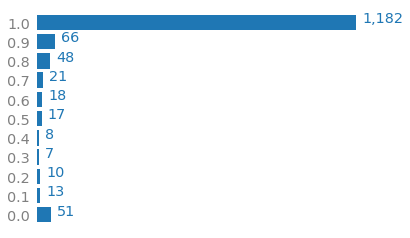

In [2]:
import pandas as pd
from pycoolplot import pycoolplot
import matplotlib

df = pd.read_csv('result_smile_score.csv')
smile_score_round = round(df['smile_score'],1)
smile_score_fq= smile_score_round.value_counts()
smile_score_fq = smile_score_fq.sort_index()
pycoolplot.horizontal_bar(smile_score_fq.index,smile_score_fq.values)
pycoolplot.plt.show()